In [125]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine
import torchinfo

In [126]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [127]:
data_path = Path("data/")
image_path = data_path / "soil_low_med_high"

In [128]:
# Get a set of pretrained model weights
weights = torchvision.models.AlexNet_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
#HyperParameters
batch_Size = 6
learning_rate = 0.001
epochS = 10
dropout_prob = 0.2

In [130]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [131]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=batch_Size)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1e6b694b050>,
 ['high', 'low', 'medium'])

In [132]:
model = torchvision.models.alexnet(weights=weights).to(device)

In [133]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.parameters():
    param.requires_grad = False

In [134]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_prob, inplace=True), 
    nn.Linear(in_features=9216, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [135]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [136]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=epochS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  2%|▏         | 1/60 [00:20<19:49, 20.16s/it]

Epoch: 1 | train_loss: 1.1145 | train_acc: 0.3929 | test_loss: 0.9633 | test_acc: 0.4167


  3%|▎         | 2/60 [00:40<19:31, 20.20s/it]

Epoch: 2 | train_loss: 0.9832 | train_acc: 0.5595 | test_loss: 0.8557 | test_acc: 0.7083


  5%|▌         | 3/60 [01:00<19:10, 20.18s/it]

Epoch: 3 | train_loss: 0.8657 | train_acc: 0.6071 | test_loss: 0.7616 | test_acc: 0.8333


  7%|▋         | 4/60 [01:19<18:29, 19.81s/it]

Epoch: 4 | train_loss: 0.6815 | train_acc: 0.7262 | test_loss: 0.7278 | test_acc: 0.7500


  8%|▊         | 5/60 [01:39<18:12, 19.86s/it]

Epoch: 5 | train_loss: 0.6145 | train_acc: 0.7381 | test_loss: 0.6840 | test_acc: 0.7917


 10%|█         | 6/60 [01:58<17:41, 19.65s/it]

Epoch: 6 | train_loss: 0.5180 | train_acc: 0.8810 | test_loss: 0.6801 | test_acc: 0.7500


 12%|█▏        | 7/60 [02:17<17:07, 19.39s/it]

Epoch: 7 | train_loss: 0.5015 | train_acc: 0.8571 | test_loss: 0.6409 | test_acc: 0.7500


 13%|█▎        | 8/60 [02:36<16:31, 19.06s/it]

Epoch: 8 | train_loss: 0.4741 | train_acc: 0.8452 | test_loss: 0.6114 | test_acc: 0.7500


 15%|█▌        | 9/60 [02:58<17:02, 20.04s/it]

Epoch: 9 | train_loss: 0.3437 | train_acc: 0.9405 | test_loss: 0.6116 | test_acc: 0.7083


 17%|█▋        | 10/60 [03:16<16:13, 19.46s/it]

Epoch: 10 | train_loss: 0.3894 | train_acc: 0.9405 | test_loss: 0.5749 | test_acc: 0.7500


 18%|█▊        | 11/60 [03:35<15:38, 19.15s/it]

Epoch: 11 | train_loss: 0.3487 | train_acc: 0.8452 | test_loss: 0.5561 | test_acc: 0.7917


 20%|██        | 12/60 [03:55<15:37, 19.53s/it]

Epoch: 12 | train_loss: 0.2799 | train_acc: 0.9881 | test_loss: 0.5620 | test_acc: 0.7500


 22%|██▏       | 13/60 [04:13<15:01, 19.19s/it]

Epoch: 13 | train_loss: 0.2470 | train_acc: 0.9762 | test_loss: 0.5643 | test_acc: 0.7917


 23%|██▎       | 14/60 [04:33<14:44, 19.22s/it]

Epoch: 14 | train_loss: 0.2363 | train_acc: 0.9881 | test_loss: 0.5475 | test_acc: 0.7083


 25%|██▌       | 15/60 [04:53<14:44, 19.66s/it]

Epoch: 15 | train_loss: 0.2431 | train_acc: 0.9881 | test_loss: 0.5305 | test_acc: 0.7917


 27%|██▋       | 16/60 [05:15<14:49, 20.21s/it]

Epoch: 16 | train_loss: 0.2266 | train_acc: 0.9762 | test_loss: 0.5206 | test_acc: 0.7083


 28%|██▊       | 17/60 [05:34<14:18, 19.97s/it]

Epoch: 17 | train_loss: 0.2260 | train_acc: 0.9524 | test_loss: 0.5324 | test_acc: 0.7500


 30%|███       | 18/60 [05:53<13:48, 19.72s/it]

Epoch: 18 | train_loss: 0.1874 | train_acc: 0.9881 | test_loss: 0.5151 | test_acc: 0.7500


 32%|███▏      | 19/60 [06:12<13:20, 19.53s/it]

Epoch: 19 | train_loss: 0.1724 | train_acc: 0.9762 | test_loss: 0.5110 | test_acc: 0.7083


 33%|███▎      | 20/60 [06:34<13:20, 20.01s/it]

Epoch: 20 | train_loss: 0.1598 | train_acc: 1.0000 | test_loss: 0.5128 | test_acc: 0.7500


 35%|███▌      | 21/60 [06:55<13:20, 20.52s/it]

Epoch: 21 | train_loss: 0.1398 | train_acc: 1.0000 | test_loss: 0.5058 | test_acc: 0.7500


 37%|███▋      | 22/60 [07:16<13:01, 20.57s/it]

Epoch: 22 | train_loss: 0.1440 | train_acc: 0.9881 | test_loss: 0.5167 | test_acc: 0.7500


 38%|███▊      | 23/60 [07:36<12:33, 20.38s/it]

Epoch: 23 | train_loss: 0.1664 | train_acc: 0.9881 | test_loss: 0.4989 | test_acc: 0.7500


 40%|████      | 24/60 [07:56<12:11, 20.31s/it]

Epoch: 24 | train_loss: 0.1111 | train_acc: 1.0000 | test_loss: 0.5113 | test_acc: 0.7500


 42%|████▏     | 25/60 [08:16<11:49, 20.28s/it]

Epoch: 25 | train_loss: 0.1442 | train_acc: 1.0000 | test_loss: 0.4967 | test_acc: 0.7500


 43%|████▎     | 26/60 [08:36<11:23, 20.11s/it]

Epoch: 26 | train_loss: 0.1134 | train_acc: 1.0000 | test_loss: 0.4947 | test_acc: 0.7500


 45%|████▌     | 27/60 [08:56<11:00, 20.00s/it]

Epoch: 27 | train_loss: 0.1021 | train_acc: 1.0000 | test_loss: 0.4814 | test_acc: 0.7917


 47%|████▋     | 28/60 [09:14<10:24, 19.51s/it]

Epoch: 28 | train_loss: 0.1111 | train_acc: 1.0000 | test_loss: 0.4968 | test_acc: 0.7500


 48%|████▊     | 29/60 [09:35<10:14, 19.83s/it]

Epoch: 29 | train_loss: 0.0937 | train_acc: 1.0000 | test_loss: 0.4960 | test_acc: 0.7500


 50%|█████     | 30/60 [09:56<10:09, 20.33s/it]

Epoch: 30 | train_loss: 0.1063 | train_acc: 0.9881 | test_loss: 0.4964 | test_acc: 0.7500


 52%|█████▏    | 31/60 [10:15<09:36, 19.89s/it]

Epoch: 31 | train_loss: 0.1026 | train_acc: 0.9881 | test_loss: 0.4940 | test_acc: 0.7500


 53%|█████▎    | 32/60 [10:35<09:19, 19.99s/it]

Epoch: 32 | train_loss: 0.0696 | train_acc: 1.0000 | test_loss: 0.4877 | test_acc: 0.7500


 55%|█████▌    | 33/60 [10:57<09:11, 20.44s/it]

Epoch: 33 | train_loss: 0.0804 | train_acc: 1.0000 | test_loss: 0.4890 | test_acc: 0.7500


 57%|█████▋    | 34/60 [11:18<08:55, 20.59s/it]

Epoch: 34 | train_loss: 0.0684 | train_acc: 1.0000 | test_loss: 0.4812 | test_acc: 0.7500


 58%|█████▊    | 35/60 [11:38<08:30, 20.43s/it]

Epoch: 35 | train_loss: 0.0739 | train_acc: 1.0000 | test_loss: 0.4827 | test_acc: 0.7500


 60%|██████    | 36/60 [11:57<07:59, 20.00s/it]

Epoch: 36 | train_loss: 0.0636 | train_acc: 1.0000 | test_loss: 0.4811 | test_acc: 0.7917


 62%|██████▏   | 37/60 [12:17<07:38, 19.95s/it]

Epoch: 37 | train_loss: 0.0842 | train_acc: 0.9881 | test_loss: 0.4920 | test_acc: 0.7500


 63%|██████▎   | 38/60 [12:36<07:16, 19.86s/it]

Epoch: 38 | train_loss: 0.0744 | train_acc: 0.9881 | test_loss: 0.4862 | test_acc: 0.7500


 65%|██████▌   | 39/60 [12:55<06:50, 19.56s/it]

Epoch: 39 | train_loss: 0.0642 | train_acc: 1.0000 | test_loss: 0.4855 | test_acc: 0.7500


 67%|██████▋   | 40/60 [13:16<06:37, 19.90s/it]

Epoch: 40 | train_loss: 0.0608 | train_acc: 1.0000 | test_loss: 0.4852 | test_acc: 0.7500


 68%|██████▊   | 41/60 [13:36<06:20, 20.04s/it]

Epoch: 41 | train_loss: 0.0601 | train_acc: 1.0000 | test_loss: 0.4906 | test_acc: 0.7500


 70%|███████   | 42/60 [13:55<05:55, 19.78s/it]

Epoch: 42 | train_loss: 0.0649 | train_acc: 1.0000 | test_loss: 0.5008 | test_acc: 0.7500


 72%|███████▏  | 43/60 [14:15<05:35, 19.71s/it]

Epoch: 43 | train_loss: 0.0512 | train_acc: 1.0000 | test_loss: 0.4885 | test_acc: 0.7500


 73%|███████▎  | 44/60 [14:35<05:16, 19.79s/it]

Epoch: 44 | train_loss: 0.0541 | train_acc: 1.0000 | test_loss: 0.4825 | test_acc: 0.7917


 75%|███████▌  | 45/60 [14:54<04:56, 19.75s/it]

Epoch: 45 | train_loss: 0.0613 | train_acc: 1.0000 | test_loss: 0.4758 | test_acc: 0.7917


 77%|███████▋  | 46/60 [15:13<04:32, 19.49s/it]

Epoch: 46 | train_loss: 0.0552 | train_acc: 1.0000 | test_loss: 0.4927 | test_acc: 0.7500


 78%|███████▊  | 47/60 [15:33<04:13, 19.47s/it]

Epoch: 47 | train_loss: 0.0564 | train_acc: 1.0000 | test_loss: 0.4830 | test_acc: 0.7500


 80%|████████  | 48/60 [15:51<03:48, 19.05s/it]

Epoch: 48 | train_loss: 0.0474 | train_acc: 1.0000 | test_loss: 0.4951 | test_acc: 0.7500


 82%|████████▏ | 49/60 [16:10<03:28, 18.94s/it]

Epoch: 49 | train_loss: 0.0426 | train_acc: 1.0000 | test_loss: 0.4838 | test_acc: 0.7500


 83%|████████▎ | 50/60 [16:28<03:07, 18.74s/it]

Epoch: 50 | train_loss: 0.0460 | train_acc: 1.0000 | test_loss: 0.4691 | test_acc: 0.7917


 85%|████████▌ | 51/60 [16:47<02:50, 18.91s/it]

Epoch: 51 | train_loss: 0.0474 | train_acc: 1.0000 | test_loss: 0.4739 | test_acc: 0.8333


 87%|████████▋ | 52/60 [17:06<02:32, 19.04s/it]

Epoch: 52 | train_loss: 0.0473 | train_acc: 1.0000 | test_loss: 0.4922 | test_acc: 0.7500


 88%|████████▊ | 53/60 [17:26<02:14, 19.18s/it]

Epoch: 53 | train_loss: 0.0372 | train_acc: 1.0000 | test_loss: 0.4809 | test_acc: 0.7917


 90%|█████████ | 54/60 [17:46<01:56, 19.39s/it]

Epoch: 54 | train_loss: 0.0435 | train_acc: 1.0000 | test_loss: 0.4890 | test_acc: 0.7500


 92%|█████████▏| 55/60 [18:06<01:38, 19.65s/it]

Epoch: 55 | train_loss: 0.0390 | train_acc: 1.0000 | test_loss: 0.4793 | test_acc: 0.7917


 93%|█████████▎| 56/60 [18:27<01:19, 19.90s/it]

Epoch: 56 | train_loss: 0.0418 | train_acc: 1.0000 | test_loss: 0.4747 | test_acc: 0.7917


 95%|█████████▌| 57/60 [18:46<00:59, 19.73s/it]

Epoch: 57 | train_loss: 0.0369 | train_acc: 1.0000 | test_loss: 0.4811 | test_acc: 0.7917


 97%|█████████▋| 58/60 [19:06<00:39, 19.82s/it]

Epoch: 58 | train_loss: 0.0358 | train_acc: 1.0000 | test_loss: 0.4727 | test_acc: 0.7917


 98%|█████████▊| 59/60 [19:25<00:19, 19.53s/it]

Epoch: 59 | train_loss: 0.0379 | train_acc: 1.0000 | test_loss: 0.4838 | test_acc: 0.7917


100%|██████████| 60/60 [19:45<00:00, 19.75s/it]

Epoch: 60 | train_loss: 0.0462 | train_acc: 1.0000 | test_loss: 0.4918 | test_acc: 0.7500
[INFO] Total training time: 1185.287 seconds


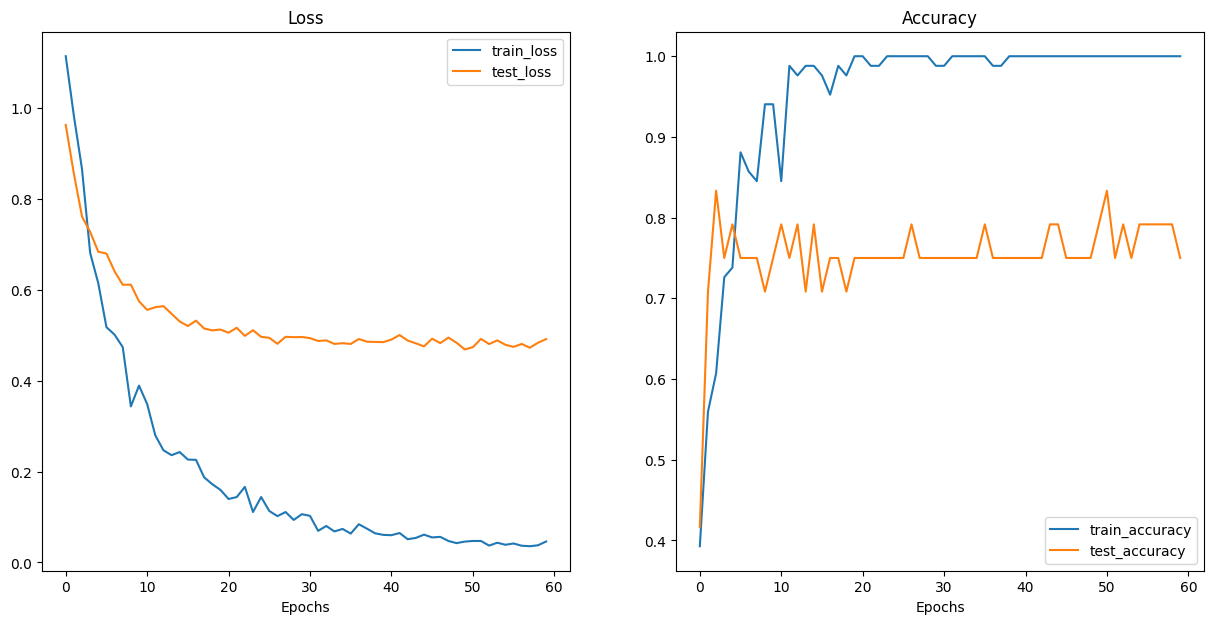

In [137]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [138]:
from winsound import Beep
Beep(300, 200)